## <center> EDA for User Behaviour & Clustering Study </center>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns

file_name1 = "rating.csv" 
file_name2 = "movie.csv" 

ratings_df = pd.read_csv(file_name1, index_col=None)
movies_df = pd.read_csv(file_name2, index_col=None)


ratings_df['review_date'] = pd.to_datetime(ratings_df['review_date'], format='mixed')
movies_df['movie_release_date'] = pd.to_datetime(movies_df['movie_release_date'], format='mixed')

ratings_df.dtypes


reviewid                 object
userid                   object
movieid                  object
movie_title              object
rating                    int64
review_date      datetime64[ns]
review_text              object
user_href                object
review_href              object
download_flag             int64
dtype: object

In [3]:
ratings_df['review_length'] = ratings_df['review_text'].str.len()
    
print(f"Total movies: {len(movies_df)}")
print(f"Total reviews: {len(ratings_df)}")
print(f"Date range: {ratings_df['review_date'].min()} to {ratings_df['review_date'].max()}")
    
ratings_df

Total movies: 5000
Total reviews: 10468
Date range: 1900-01-01 00:00:00 to 2024-11-03 00:00:00


,reviewid,userid,movieid,movie_title,rating,review_date,review_text,user_href,review_href,download_flag,review_length
0,4fb026f6760ee33b55006268,darrenhamilton14,62213-dark-shadows,Dark Shadows,85,2012-05-13,Let\'s leave it all at the door here. I loved ...,/u/darrenhamilton14,/review/4fb026f6760ee33b55006268,1,1469.0
1,4fcb0d2a19c2955e3c000e35,gerithecat,59961-safe-house,Safe House,80,2012-06-03,fast paced action thriller delivers from begin...,/u/gerithecat,/review/4fcb0d2a19c2955e3c000e35,1,183.0
2,4fce77e4760ee365510004f1,tmdb87069603,74534-the-best-exotic-marigold-hotel,The Best Exotic Marigold Hotel,85,2012-06-05,This is an excellent movie with a great cast. ...,/u/tmdb87069603,/review/4fce77e4760ee365510004f1,1,603.0
3,4fce88ed19c29523e0000069,tmdb87069603,10763-dr-t-the-women,Dr. T & the Women,0,2012-06-05,"After writing three high-praise reviews, I tri...",/u/tmdb87069603,/review/4fce88ed19c29523e0000069,1,1341.0
4,4fce8bc519c29523e00000a4,tmdb87069603,70160-the-hunger-games,The Hunger Games,75,2012-06-05,"Very well made movie with quality writing, act...",/u/tmdb87069603,/review/4fce8bc519c29523e00000a4,1,471.0
...,...,...,...,...,...,...,...,...,...,...,...
10463,671dff875be9e8759da783e9,msbreviews,1184918-the-wild-robot,The Wild Robot,90,2024-10-27,FULL SPOILER-FREE REVIEW @ https://movieswetex...,/u/msbreviews,/review/671dff875be9e8759da783e9,1,898.0
10464,672127e71d0b571b8a5bfad8,IndecentLouie,889737-joker-folie-a-deux,Joker: Folie à Deux,60,2024-10-29,"Meh I liked it, not as much as Joker (2019) bu...",/u/IndecentLouie,/review/672127e71d0b571b8a5bfad8,1,405.0
10465,672363aed9a8a77b5da47a0d,Geronimo1967,912649-venom-the-last-dance,Venom: The Last Dance,60,2024-10-31,Perhaps this was just one sequel too many as t...,/u/Geronimo1967,/review/672363aed9a8a77b5da47a0d,1,1380.0
10466,67267f06554083a56a0d4e20,GenerationofSwine,9411-fallen,Fallen,0,2024-11-02,I generally have a distaste for movies where D...,/u/GenerationofSwine,/review/67267f06554083a56a0d4e20,0,1220.0


In [ ]:
#to check user statistic and engagement level

In [5]:
user_stats = {
        'total_users': ratings_df['userid'].nunique(),
        'total_reviews': len(ratings_df),
        'avg_reviews_per_user': len(ratings_df) / ratings_df['userid'].nunique(),
        'avg_rating': ratings_df['rating'].mean(),
        'rating_std': ratings_df['rating'].std()
    }


user_stats
   

{'total_users': 1210,
 'total_reviews': 10468,
 'avg_reviews_per_user': 8.651239669421487,
 'avg_rating': 43.55368742835308,
 'rating_std': 36.17396481127964}

In [7]:
user_engagement = ratings_df.groupby('userid').agg({
        'rating': ['count', 'mean', 'std'],
        'review_length': ['mean', 'max', 'min'],
        'movieid': 'nunique'  # Number of unique movies reviewed
    }).round(2)

sorted = user_engagement.sort_values(('movieid', 'nunique'), ascending=False)
print(sorted)

                rating                review_length                movieid
                 count    mean    std          mean     max    min nunique
userid                                                                    
Geronimo1967      1249   40.55  31.58       1466.16  3203.0    1.0    1243
John+Chard         650   42.42  38.71       2116.78  5775.0  379.0     639
Ruuz               580   34.90  29.21        610.68  6039.0   11.0     575
r96sk              577   47.78  37.00        958.07  4115.0  315.0     574
Wuchak             548   40.77  35.50       2087.67  6190.0  632.0     546
...                ...     ...    ...           ...     ...    ...     ...
Yuva_Kumar           1  100.00    NaN         32.00    32.0   32.0       1
Yvonnelim99          1   70.00    NaN         42.00    42.0   42.0       1
ZHidayaturahman      1  100.00    NaN         15.00    15.0   15.0       1
ZION-LION            1    0.00    NaN         50.00    50.0   50.0       1
bosladi25            1   

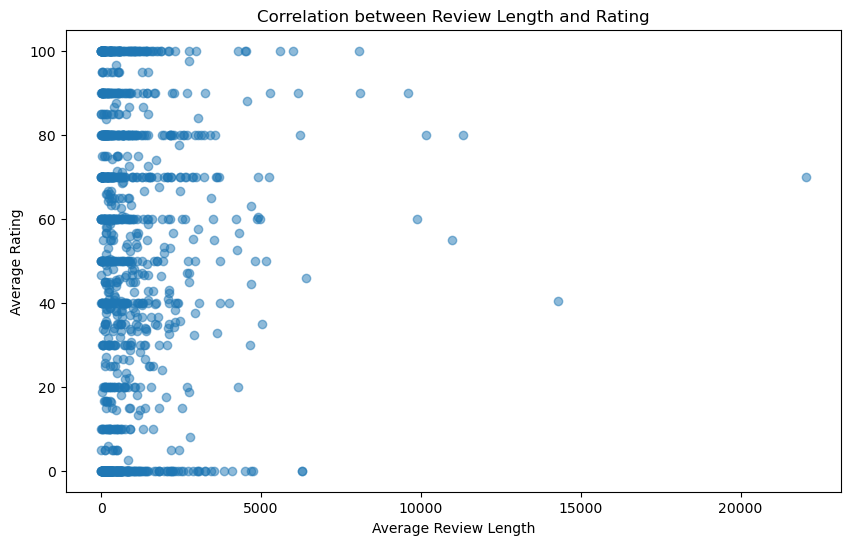

Correlation coefficient between review length and rating: 0.022


In [9]:
correlation = user_engagement[('review_length', 'mean')].corr(user_engagement[('rating', 'mean')])

plt.figure(figsize=(10, 6))
plt.scatter(user_engagement[('review_length', 'mean')], 
           user_engagement[('rating', 'mean')], 
           alpha=0.5)
plt.xlabel('Average Review Length')
plt.ylabel('Average Rating')
plt.title('Correlation between Review Length and Rating')
plt.show()

print(f"Correlation coefficient between review length and rating: {correlation:.3f}")

In [11]:
review_counts = ratings_df.groupby('userid')['rating'].count()
    
def classify_user(count):
        if count <= 2:  
            return 'Casual'
        elif count <= 5:  
            return 'Regular'
        else: 
            return 'Power User'
    
user_engagement['activity_level'] = review_counts.map(classify_user)

user_engagement



rating                review_length                 \
                     count    mean    std          mean     max    min   
userid                                                                   
007ace                   1   40.00    NaN        293.00   293.0  293.0   
15bq1a05k9               1  100.00    NaN         54.00    54.0   54.0   
1HONEY                   1    0.00    NaN         28.00    28.0   28.0   
1JohnSmith1             10   66.00  20.66        176.60   271.0   50.0   
1RobertJohnson1          2   15.00  21.21        144.50   210.0   79.0   
...                    ...     ...    ...           ...     ...    ...   
zaynerocks128isback      1    0.00    NaN        135.00   135.0  135.0   
zenorking                1   50.00    NaN         19.00    19.0   19.0   
zerolimit                3   51.67  37.86        167.33   247.0  117.0   
zmmetz                   1   20.00    NaN        754.00   754.0  754.0   
zombieakacris            2   35.00  49.50       1104.00  1310.0  898.0   

                    movieid activity_level  
                    nunique                 
userid                                      
007ace                    1         Casual  
15bq1a05k9                1         Casual  
1HONEY                    1         Casual  
1JohnSmith1              10     Power User  
1RobertJohnson1           2         Casual  
...                     ...            ...  
zaynerocks128isback       1         Casual  
zenorking                 1         Casual  
zerolimit                 3        Regular  
zmmetz                    1         Casual  
zombieakacris             2         Casual  

[1210 rows x 8 columns]

C:\Users\Eric\AppData\Local\Temp\ipykernel_26468\938202542.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index,


<Figure size 1200x800 with 0 Axes>

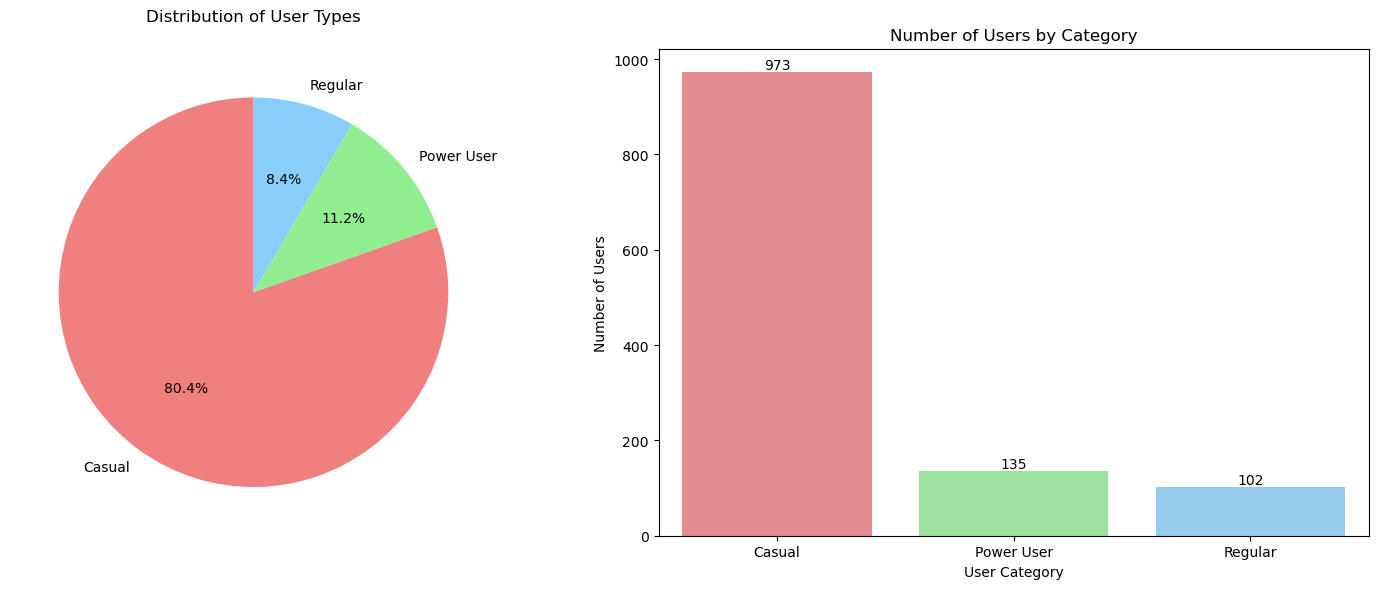

In [15]:
user_categories = review_counts.map(classify_user)
    
category_counts = user_categories.value_counts()
    
plt.figure(figsize=(12, 8))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
# 1. draw Pie Chart
colors = ['lightcoral', 'lightgreen', 'lightskyblue']
ax1.pie(category_counts.values, 
            labels=category_counts.index,
            autopct='%1.1f%%',
            colors=colors,
            startangle=90)
ax1.set_title('Distribution of User Types', pad=20)


# 2. draw Bar Plot
sns.barplot(x=category_counts.index, 
                y=category_counts.values, 
                ax=ax2,
                palette=colors)
ax2.set_title('Number of Users by Category')
ax2.set_ylabel('Number of Users')
ax2.set_xlabel('User Category')
    
    # Add value labels on bars
for i, v in enumerate(category_counts.values):
        ax2.text(i, v, str(v), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [87]:
# combine both rating and movie dataset
merged_df = ratings_df.merge(
    movies_df[['movieid', 'movie_title', 'movie_release_date', 'movie_year']], 
    on='movieid', 
    how='left'
)


merged_df['review_date'] = pd.to_datetime(merged_df['review_date'])
merged_df['movie_release_date'] = pd.to_datetime(merged_df['movie_release_date'])

# Remove records with invalid dates (eg. year 1900)
valid_df = merged_df[merged_df['review_date'].dt.year != 1900].copy()


valid_df['days_after_release'] = (valid_df['review_date'] - valid_df['movie_release_date']).dt.days


sorted_reviews = valid_df[['userid', 'movie_title_y', 'rating', 'review_date', 
                          'movie_release_date', 'days_after_release']]\
    .sort_values('days_after_release')\
    .reset_index(drop=True)  


print("\nReviews sorted by time after release:")
print("UserID | Movie Title | Rating | Review Date | Release Date | Days After Release")
print(sorted_reviews.head(5).to_string(index=False))  

print("\nSummary Statistics:")
print(f"Total number of reviews: {len(sorted_reviews)}")
print(f"Number of unique users: {sorted_reviews['userid'].nunique()}")
print(f"Number of unique movies: {sorted_reviews['movie_title_y'].nunique()}")
print(f"Earliest review: {sorted_reviews['days_after_release'].min()} days after release")
print(f"Latest review: {sorted_reviews['days_after_release'].max()} days after release")
print(f"Average time to review: {sorted_reviews['days_after_release'].mean():.1f} days")
print(f"Median time to review: {sorted_reviews['days_after_release'].median():.1f} days")


Reviews sorted by time after release:
UserID | Movie Title | Rating | Review Date | Release Date | Days After Release
        userid            movie_title_y  rating review_date movie_release_date  days_after_release
      futuretv            The Godfather     100  2014-04-10         2022-02-25               -2878
         tanty              The Shining       0  2012-11-05         2019-10-31               -2551
    John+Chard                     Jaws     100  2014-08-28         2021-06-10               -2478
Steve+Freeling The Silence of the Lambs     100  2015-07-17         2021-08-08               -2214
      markuspm    2001: A Space Odyssey       0  2013-12-23         2018-09-27               -1739

Summary Statistics:
Total number of reviews: 10421
Number of unique users: 1208
Number of unique movies: 3456
Earliest review: -2878 days after release
Latest review: 33145 days after release
Average time to review: 4569.9 days
Median time to review: 2642.0 days


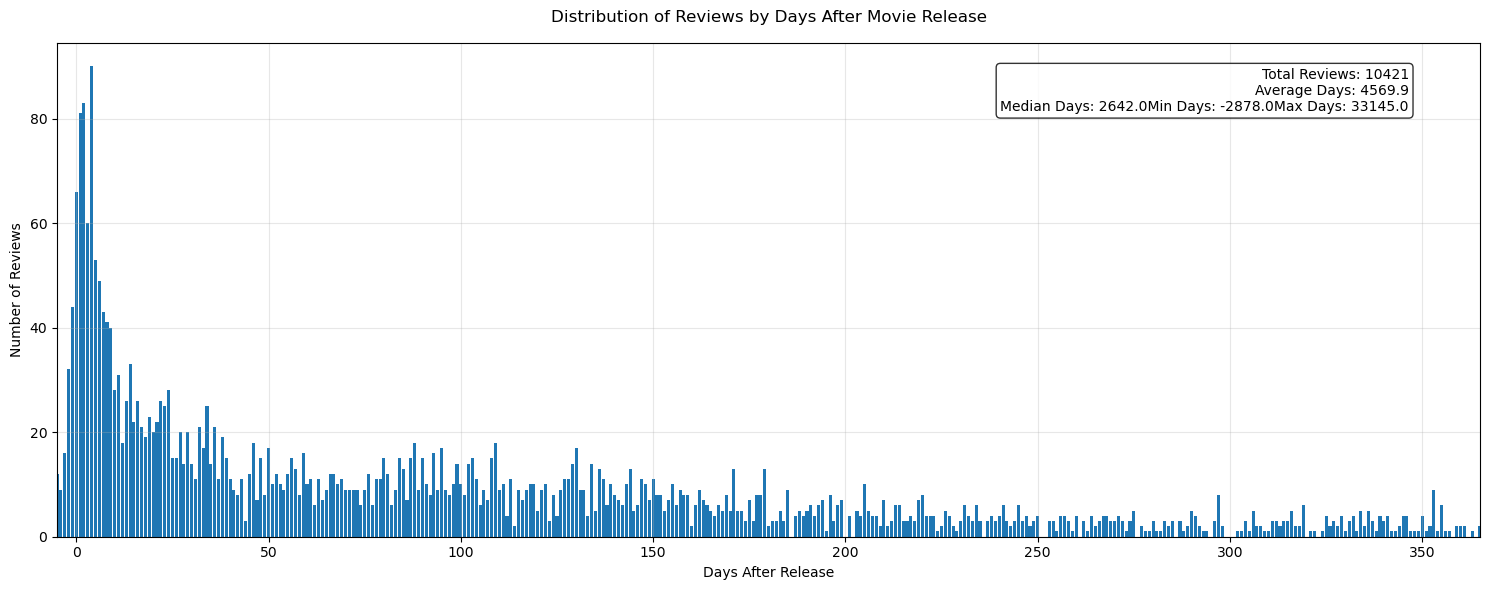


Distribution Summary (First 90 days):
Number of reviews in first 90 days: 2185
Percentage of total reviews: 21.0%
Most common review timing: 4 days after release
Number of reviews on peak day: 90


In [29]:

plt.figure(figsize=(15, 6))

days_counts = sorted_reviews['days_after_release'].value_counts().sort_index()

plt.bar(days_counts.index, days_counts.values)
plt.title('Distribution of Reviews by Days After Movie Release', pad=15)
plt.xlabel('Days After Release')
plt.ylabel('Number of Reviews')
plt.xlim(-5, 365)  # initially the plot too large, adjust to zoom in


plt.grid(True, alpha=0.3)

stats_text = f'Total Reviews: {len(sorted_reviews)}\n'
stats_text += f'Average Days: {sorted_reviews["days_after_release"].mean():.1f}\n'
stats_text += f'Median Days: {sorted_reviews["days_after_release"].median():.1f}'
stats_text += f'Min Days: {sorted_reviews["days_after_release"].min():.1f}'
stats_text += f'Max Days: {sorted_reviews["days_after_release"].max():.1f}'
plt.text(0.95, 0.95, stats_text,
        transform=plt.gca().transAxes,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



focused_days = days_counts[days_counts.index <= 90]
print("\nDistribution Summary (First 90 days):")
print(f"Number of reviews in first 90 days: {focused_days.sum()}")
print(f"Percentage of total reviews: {(focused_days.sum()/len(sorted_reviews)*100):.1f}%")
print(f"Most common review timing: {focused_days.index[focused_days.argmax()]} days after release")
print(f"Number of reviews on peak day: {focused_days.max()}")

In [ ]:
#clusting by ROI and movie rating

In [81]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_movie_features(movies_df, ratings_df):
    
    movie_ratings = ratings_df.groupby('movieid').agg({'rating': ['mean', 'count', 'std']}).round(2)
    
    movie_ratings.columns = ['avg_rating', 'num_reviews', 'rating_std']
    
    movie_features = movies_df[['movieid', 'budget', 'revenue']].merge(movie_ratings, left_on='movieid', right_index=True)
    
    movie_features['roi'] = (movie_features['revenue'] - movie_features['budget']) / movie_features['budget']
    
    movie_features = movie_features.replace([np.inf, -np.inf], np.nan).dropna()
    
    return movie_features

def perform_clustering(features_df, n_clusters=4):

    clustering_features = ['avg_rating', 'num_reviews', 'rating_std', 'roi']
    
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_df[clustering_features])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    features_df['cluster'] = clusters
    
    return features_df, kmeans, clustering_features

def analyze_clusters(features_df, clustering_features):

    cluster_stats = features_df.groupby('cluster')[clustering_features].agg(['mean', 'std', 'count']).round(2)
    
    return cluster_stats


if __name__ == "__main__":

        movies_df = pd.read_csv('movie.csv')
        ratings_df = pd.read_csv('rating.csv')
        
        movie_features = prepare_movie_features(movies_df, ratings_df)
        

        clustered_features, kmeans_model, clustering_features = perform_clustering(movie_features)
        
        cluster_statistics = analyze_clusters(clustered_features, clustering_features)

        print(cluster_statistics)
        
        for cluster in range(kmeans_model.n_clusters):
            cluster_data = clustered_features[clustered_features['cluster'] == cluster]
            print(f"\nCluster {cluster} characteristics:")
            print(f"Number of movies: {len(cluster_data)}")
            print(f"Average rating: {cluster_data['avg_rating'].mean():.2f}")
            print(f"Average ROI: {cluster_data['roi'].mean():.2f}")
            print(f"Average number of reviews: {cluster_data['num_reviews'].mean():.2f}")
        


        avg_rating              num_reviews             rating_std         \
              mean    std count        mean   std count       mean    std   
cluster                                                                     
0            66.64  13.18  1100        3.21  1.20  1100      14.79  10.15   
1             0.44   3.96   850        3.18  1.59   850       0.02   0.40   
2            63.00  19.93   324        8.74  1.71   324      18.72   8.72   
3            36.75  39.60    10        3.50  1.43    10       7.14   7.83   

                  roi                
        count    mean     std count  
cluster                              
0        1100    5.46   10.75  1100  
1         850    4.17   10.18   850  
2         324    4.54    6.66   324  
3          10  373.31  206.84    10  

Cluster 0 characteristics:
Number of movies: 1100
Average rating: 66.64
Average ROI: 5.46
Average number of reviews: 3.21

Cluster 1 characteristics:
Number of movies: 850
Average rating: 0.44


Before cleaning:
Total number of records: 2284
Number of blank/null ratings: 0
Number of zero ratings: 864

After cleaning:
Total number of records: 1420
Number of records removed: 864

New Cluster Analysis:

Cluster 0 Analysis:
Number of movies: 292
Average ROI: 4.46
Average Rating: 68.09
Average Number of Reviews: 8.71
Average Budget: $124,116,438.36
Average Revenue: $512,667,358.23
-------------------------

Cluster 1 Analysis:
Number of movies: 810
Average ROI: 7.11
Average Rating: 71.20
Average Number of Reviews: 3.18
Average Budget: $61,650,068.70
Average Revenue: $243,640,117.33
-------------------------

Cluster 2 Analysis:
Number of movies: 316
Average ROI: 3.89
Average Rating: 53.08
Average Number of Reviews: 3.41
Average Budget: $66,950,427.05
Average Revenue: $218,728,815.27
-------------------------

Cluster 3 Analysis:
Number of movies: 2
Average ROI: 683.96
Average Rating: 68.34
Average Number of Reviews: 3.00
Average Budget: $532,500.00
Average Revenue: $296,677,900.00


C:\Users\Eric\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Eric\AppData\Local\Temp\ipykernel_26468\455113899.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values,


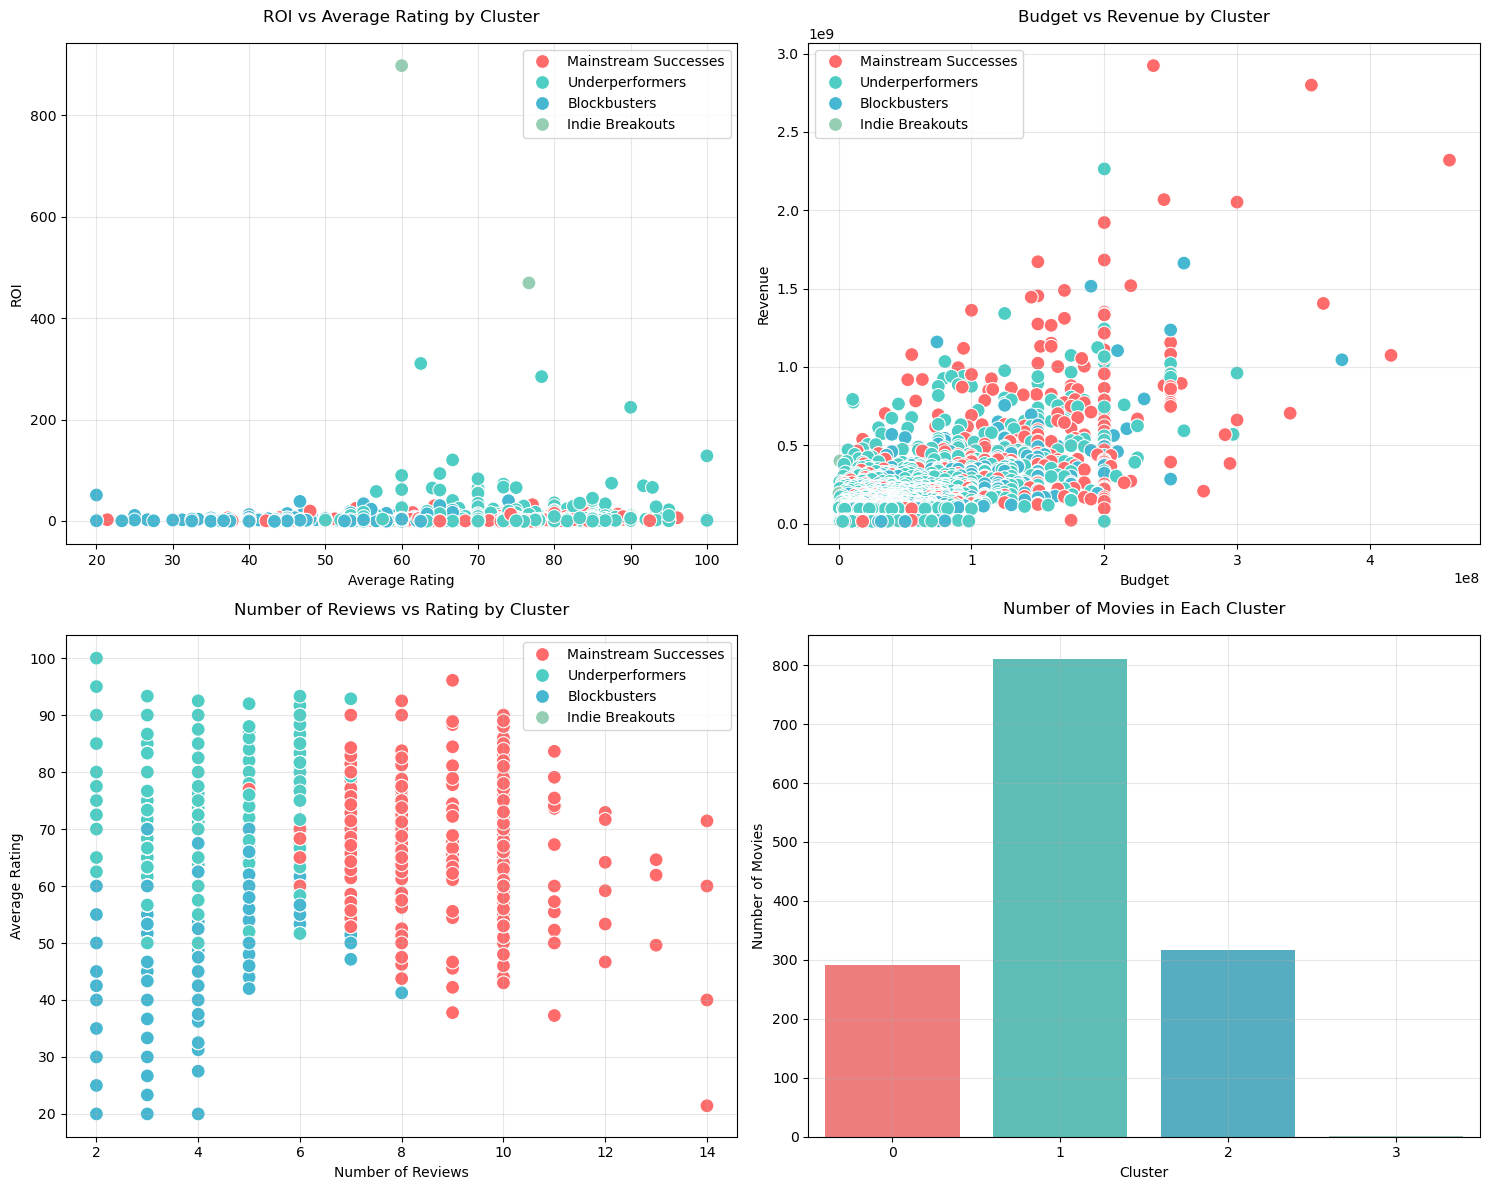

In [83]:
#perform preprocessing
print("Before cleaning:")
print(f"Total number of records: {len(clustered_features)}")
print("Number of blank/null ratings:", clustered_features['avg_rating'].isna().sum())
print("Number of zero ratings:", (clustered_features['avg_rating'] == 0).sum())


clean_features = clustered_features[
   (clustered_features['avg_rating'].notna()) & 
   (clustered_features['avg_rating'] != 0)
].copy()

print("\nAfter cleaning:")
print(f"Total number of records: {len(clean_features)}")
print(f"Number of records removed: {len(clustered_features) - len(clean_features)}")


scaler = StandardScaler()
clustering_features = ['avg_rating', 'num_reviews', 'rating_std', 'roi']
scaled_features = scaler.fit_transform(clean_features[clustering_features])


kmeans = KMeans(n_clusters=4, random_state=42)
clean_features['cluster'] = kmeans.fit_predict(scaled_features)


print("\nNew Cluster Analysis:")
for cluster in range(4):
   cluster_data = clean_features[clean_features['cluster'] == cluster]
   print(f"\nCluster {cluster} Analysis:")
   print(f"Number of movies: {len(cluster_data)}")
   print(f"Average ROI: {cluster_data['roi'].mean():.2f}")
   print(f"Average Rating: {cluster_data['avg_rating'].mean():.2f}")
   print(f"Average Number of Reviews: {cluster_data['num_reviews'].mean():.2f}")
   print(f"Average Budget: ${cluster_data['budget'].mean():,.2f}")
   print(f"Average Revenue: ${cluster_data['revenue'].mean():,.2f}")
   print("-------------------------")


colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: ROI vs Rating
sns.scatterplot(data=clean_features, x='avg_rating', y='roi', 
               hue='cluster', palette=colors, ax=ax1, s=100)
ax1.set_title('ROI vs Average Rating by Cluster', fontsize=12, pad=15)
ax1.set_xlabel('Average Rating', fontsize=10)
ax1.set_ylabel('ROI', fontsize=10)

# Plot 2: Budget vs Revenue
sns.scatterplot(data=clean_features, x='budget', y='revenue', 
               hue='cluster', palette=colors, ax=ax2, s=100)
ax2.set_title('Budget vs Revenue by Cluster', fontsize=12, pad=15)
ax2.set_xlabel('Budget', fontsize=10)
ax2.set_ylabel('Revenue', fontsize=10)

# Plot 3: Number of Reviews vs Rating
sns.scatterplot(data=clean_features, x='num_reviews', y='avg_rating', 
               hue='cluster', palette=colors, ax=ax3, s=100)
ax3.set_title('Number of Reviews vs Rating by Cluster', fontsize=12, pad=15)
ax3.set_xlabel('Number of Reviews', fontsize=10)
ax3.set_ylabel('Average Rating', fontsize=10)

# Plot 4: Cluster Sizes
cluster_sizes = clean_features['cluster'].value_counts()
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, 
           palette=colors, ax=ax4)
ax4.set_title('Number of Movies in Each Cluster', fontsize=12, pad=15)
ax4.set_xlabel('Cluster', fontsize=10)
ax4.set_ylabel('Number of Movies', fontsize=10)


legend_labels = ['Mainstream Successes', 'Underperformers', 
                'Blockbusters', 'Indie Breakouts']
for ax in [ax1, ax2, ax3]:
   handles, _ = ax.get_legend_handles_labels()
   ax.legend(handles, legend_labels)

# Customize grid
for ax in [ax1, ax2, ax3, ax4]:
   ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()